<a href="https://colab.research.google.com/github/yashwanth-kokkanti/kerasPractise/blob/main/autoEncoderDecoderKerasMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## This example demonstrates AutoEncoder Decoder using MNIST data 

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Conv2D, MaxPooling2D, UpSampling2D

from tensorflow.keras import backend as k 
from tensorflow.keras.datasets import mnist 

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train ), (x_test, y_test) = mnist.load_data()

## Converting into Float and normalizing RGB code by dividing with 255 

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## Reshape the input from (28, 28 ) tuple to (28, 28, 1)

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print (x_train.shape, x_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [3]:
input_img = Input(shape=(28, 28, 1))

## Encoding Shape 
x = Conv2D(16, (3, 3), activation='relu', padding='same',)(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same',)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same',)(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

## Decoding section 
x = Conv2D(8, (3, 3), activation='relu', padding='same',)(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same',)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [4]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=64, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
938/938 [==============================] - 8s 9ms/step - loss: 0.1766 - accuracy: 0.7990 - val_loss: 0.1338 - val_accuracy: 0.8050
Epoch 2/100
938/938 [==============================] - 7s 8ms/step - loss: 0.1258 - accuracy: 0.8068 - val_loss: 0.1180 - val_accuracy: 0.8076
Epoch 3/100
938/938 [==============================] - 7s 8ms/step - loss: 0.1151 - accuracy: 0.8092 - val_loss: 0.1111 - val_accuracy: 0.8086
Epoch 4/100
938/938 [==============================] - 7s 8ms/step - loss: 0.1097 - accuracy: 0.8103 - val_loss: 0.1067 - val_accuracy: 0.8097
Epoch 5/100
938/938 [==============================] - 7s 8ms/step - loss: 0.1066 - accuracy: 0.8109 - val_loss: 0.1042 - val_accuracy: 0.8101
Epoch 6/100
938/938 [==============================] - 7s 8ms/step - loss: 0.1044 - accuracy: 0.8113 - val_loss: 0.1025 - val_accuracy: 0.8108
Epoch 7/100
938/938 [==============================] - 7s 8ms/step - loss: 0.1027 - accuracy: 0.8116 - val_loss: 0.1009 - val_accuracy: 0.8108

In [5]:
loss, accuracy = autoencoder.evaluate(x_test, x_test, verbose=0)
print ("Loss : ", loss, " : Accuracy : ", accuracy*100)

Loss :  0.08450548350811005  : Accuracy :  81.313556432724


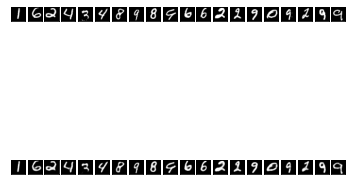

In [8]:
## Reconstructing Images 
num_images = 20
np.random.seed(42)

random_test_images = np.random.randint(x_test.shape[0], size=num_images)

decoded_imgs = autoencoder.predict(x_test)

for i, image in enumerate(random_test_images):
  ## Plot Original Image 
  ax = plt.subplot(3, num_images, i+1)
  plt.imshow(x_test[image].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ## Plot Predicted Image 
  ax = plt.subplot(3, num_images, 2*num_images + i + 1)
  plt.imshow(decoded_imgs[image].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
print('')